<B>Complete the following exercises. Each question is a single codeblock with the question at the top as a comment.</b>

You may find the following resources helpful:
    
<a href="http://pandas.pydata.org/pandas-docs/stable/10min.html">10 Minutes to Pandas</a><BR>
<a href="https://www.youtube.com/watch?v=w26x-z-BdWQ">Pandas Video Tutorial by Wes McKinney(!)</a><BR>
<a href="https://github.com/guipsamora/pandas_exercises">Pandas Exercises</a><BR>
<a href="https://github.com/lemonbalm/pandas-exercises">More Pandas Exercises</a><BR>

* (1) Import numpy as np, matplotlib.pyplot as plt, and pandas as pd. Set matplotlib to inline display.
* (2) Read the Fisher Iris Data in as a variable called df.
* (3) Display the first five lines of df using head.
* (4-7) - Plot a histogram of each of the four variables (leaf/sepal length/width).  Adjust the number of bins to produce a resolution you find instructive/visually satisfying.  Use xlabel and ylabel to label the axes.
* (8) - Save this figure use savefig.
* (9) Using groupby, group the data by species
* (10) Using the groups, create a bar graph of the mean sepal length by species.  Label the axes.
* (11) Use subplots to make a 2x2 pane figure, with each pane a scatterplot of your choosing.  Make sure axes are labeled!
* (12) Use tail to print out the last 10 rows of df.
* (13) Use a combination of np.sum() and a selector (e.g., (df['x'] > 3), count how many rows have a petal length greater than 40.
* (14) How many have a sepal width below the median sepal width?
* (15) Use groups and np.mean to report the mean values for each variable.
* (16) Calculate a new variable based on existing variables, and create a histogram of its distribution.
* (17) Export the data with the new calculated variable as an Excel file.  Open it in Excel, and comment on its appearance.  Look at the documentation of to_excel and figure out how to make it so the index values (line numbers) don't get exported.
* (18-25) Download the prepared election data (https://github.com/thomaspingel/geodata/blob/master/election/state_election_data_1976-2016.csv), load it as a new dataframe, and use some of the commands above to explore the dataset.

In [1]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#2
df = pd.read_csv('fisher_iris_data.csv')

In [3]:
#3
df.head(5)

,species,petal_width,petal_length,sepal_width,sepal_length
0,setosa,2,14,33,50
1,setosa,2,10,36,46
2,setosa,2,16,31,48
3,setosa,1,14,36,49
4,setosa,2,13,32,44


Text(0, 0.5, 'Frequency')

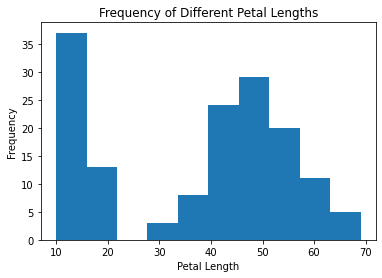

In [4]:
#4
_ = plt.hist(df.petal_length, bins = 10)
plt.title('Frequency of Different Petal Lengths')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

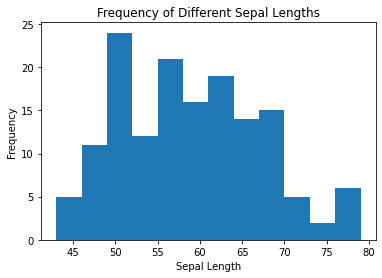

In [5]:
#5
_ = plt.hist(df.sepal_length, bins = 12)
plt.title('Frequency of Different Sepal Lengths')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

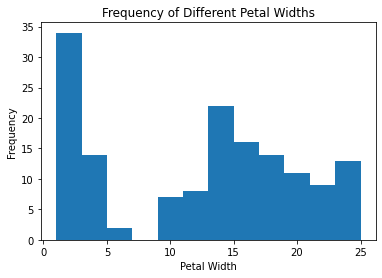

In [6]:
#6
_ = plt.hist(df.petal_width, bins = 12)
plt.title('Frequency of Different Petal Widths')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')

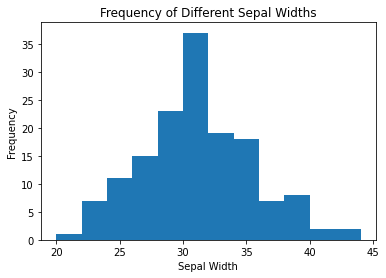

In [7]:
#7
_ = plt.hist(df.sepal_width, bins = 12)
plt.title('Frequency of Different Sepal Widths')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')

#8
plt.savefig('SepalWidthHist.png', dpi = 300)

In [8]:
#9
groups = df.groupby(by = 'species')

Text(0.5, 0, 'Species')

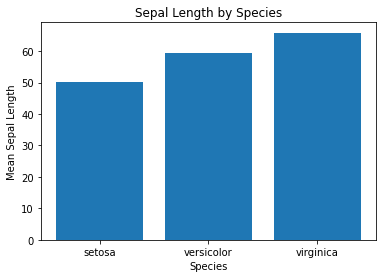

In [9]:
#10
mean = groups['sepal_length'].mean()
plt.bar(mean.index,mean)
plt.title('Sepal Length by Species')
plt.ylabel('Mean Sepal Length')
plt.xlabel('Species')

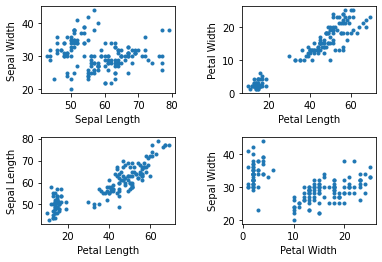

In [10]:
#11
plt.subplot(2,2,1)
_ = plt.plot(df.sepal_length, df.sepal_width, '.')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(2,2,2)
_ = plt.plot(df.petal_length, df.petal_width, '.')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


plt.subplot(2,2,3)
_ = plt.plot(df.petal_length, df.sepal_length, '.')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')


plt.subplot(2,2,4)
_= plt.plot(df.petal_width, df.sepal_width, '.')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')

#spce out subplots so axes can be seen
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

In [11]:
#12
df.tail(10)

,species,petal_width,petal_length,sepal_width,sepal_length
140,virginica,16,58,30,72
141,virginica,21,59,30,71
142,virginica,18,56,29,63
143,virginica,23,69,26,77
144,virginica,19,61,28,74
145,virginica,18,63,29,73
146,virginica,22,58,30,65
147,virginica,19,53,27,64
148,virginica,20,50,25,57
149,virginica,24,51,28,58


In [12]:
#13
np.sum(df['petal_length'] > 40)

85

In [13]:
#14 57
median = np.median(df.sepal_width)
np.sum(df.sepal_width < median)

57

In [14]:
#15
groups = df.groupby(by='species')
plength = groups['petal_length'].mean()

pwidth = groups['petal_width'].mean()

slength = groups['sepal_length'].mean()

swidth = groups['sepal_width'].mean()

plength, pwidth, slength, swidth

(species
 setosa        14.62
 versicolor    43.22
 virginica     55.52
 Name: petal_length, dtype: float64,
 species
 setosa         2.46
 versicolor    13.26
 virginica     20.06
 Name: petal_width, dtype: float64,
 species
 setosa        50.10
 versicolor    59.36
 virginica     65.88
 Name: sepal_length, dtype: float64,
 species
 setosa        34.28
 versicolor    27.64
 virginica     29.74
 Name: sepal_width, dtype: float64)

In [15]:
#15 simplified (from the notes), realized I had done too much
groups = df.groupby(by='species')
groups.mean()

,petal_width,petal_length,sepal_width,sepal_length
species,,,,
setosa,2.46,14.62,34.28,50.10
versicolor,13.26,43.22,27.64,59.36
virginica,20.06,55.52,29.74,65.88


Text(0, 0.5, 'Frequency')

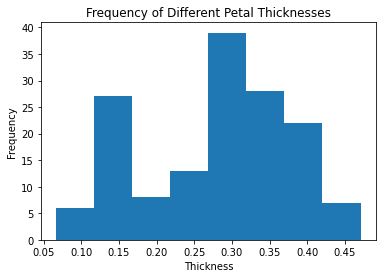

In [16]:
#16
df['petal_thickness'] = df.petal_width / df.petal_length
_ = plt.hist(df.petal_thickness, bins = 8)
plt.title('Frequency of Different Petal Thicknesses')
plt.xlabel('Thickness')
plt.ylabel('Frequency')

In [17]:
#17 Before setting index to false, the index numbers were included as the first column in the excel file.
df.to_excel('petal_thickness.xlsx',index=False)

In [18]:
#18
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/state_election_data_1976-2016.csv'
df = pd.read_csv(url)

In [19]:
#19
#select the states that GOP won in 2016, one of many ways to do so
df[df.gop_2016_prc > df.dem_2016_prc]

,state,state_po,state_fips,gop_1976_votes,dem_1976_votes,totalvotes_1976,gop_1976_prc,dem_1976_prc,gop_minus_dem_prc_1976,gop_1980_votes,...,totalvotes_2012,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016
0,Alabama,AL,1,504070,659170,1182850,42.61,55.73,-13.12,654192,...,2074338,60.55,38.36,22.19,1318255,729547,2123372,62.08,34.36,27.72
1,Alaska,AK,2,71555,44058,123574,57.90,35.65,22.25,86112,...,300495,54.80,40.81,13.99,163387,116454,318608,51.28,36.55,14.73
2,Arizona,AZ,4,418642,295602,742719,56.37,39.80,16.57,529688,...,2299254,53.65,44.59,9.06,1252401,1161167,2573165,48.67,45.13,3.54
3,Arkansas,AR,5,267903,498604,767535,34.90,64.96,-30.06,403164,...,1069468,60.57,36.88,23.69,684872,380494,1130635,60.57,33.65,26.92
9,Florida,FL,12,1469531,1636000,3150631,46.64,51.93,-5.29,2046951,...,8474179,49.13,50.01,-0.88,4617886,4504975,9420039,49.02,47.82,1.20
10,Georgia,GA,13,483743,979409,1463152,33.06,66.94,-33.88,654168,...,3897839,53.33,45.51,7.82,2089104,1877963,4114732,50.77,45.64,5.13
12,Idaho,ID,16,204151,126549,340932,59.88,37.12,22.76,290699,...,652274,64.53,32.62,31.91,409055,189765,690255,59.26,27.49,31.77
14,Indiana,IN,18,1183958,1014714,2220362,53.32,45.70,7.62,1255656,...,2624534,54.13,43.93,10.20,1557286,1033126,2734958,56.94,37.77,19.17
15,Iowa,IA,19,632864,619931,1279303,49.47,48.46,1.01,676026,...,1582180,46.18,51.99,-5.81,800983,653669,1565580,51.16,41.75,9.41
16,Kansas,KS,20,502752,430421,957845,52.49,44.94,7.55,566812,...,1159971,59.71,37.99,21.72,671018,427005,1184402,56.65,36.05,20.60


In [20]:
#20
#create new field of democratic change from 2012-2016
df['Dem Change in 2016'] = df.dem_2016_prc - df.dem_2012_prc
df.head()

,state,state_po,state_fips,gop_1976_votes,dem_1976_votes,totalvotes_1976,gop_1976_prc,dem_1976_prc,gop_minus_dem_prc_1976,gop_1980_votes,...,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,Dem Change in 2016
0,Alabama,AL,1,504070,659170,1182850,42.61,55.73,-13.12,654192,...,60.55,38.36,22.19,1318255,729547,2123372,62.08,34.36,27.72,-4.00
1,Alaska,AK,2,71555,44058,123574,57.90,35.65,22.25,86112,...,54.80,40.81,13.99,163387,116454,318608,51.28,36.55,14.73,-4.26
2,Arizona,AZ,4,418642,295602,742719,56.37,39.80,16.57,529688,...,53.65,44.59,9.06,1252401,1161167,2573165,48.67,45.13,3.54,0.54
3,Arkansas,AR,5,267903,498604,767535,34.90,64.96,-30.06,403164,...,60.57,36.88,23.69,684872,380494,1130635,60.57,33.65,26.92,-3.23
4,California,CA,6,3882244,3742284,7803770,49.75,47.95,1.80,4522994,...,37.12,60.24,-23.12,4483810,8753788,14181595,31.62,61.73,-30.11,1.49


In [21]:
#21
#calculate how many people voted in 2016 and 1976
modern_votes = np.sum(df.totalvotes_2016)
seventies_votes = np.sum(df.totalvotes_1976)
print("There were", modern_votes, "votes in 2016, compared to", seventies_votes, "votes in 1976.")

There were 155172801 votes in 2016, compared to 88269606 votes in 1976.


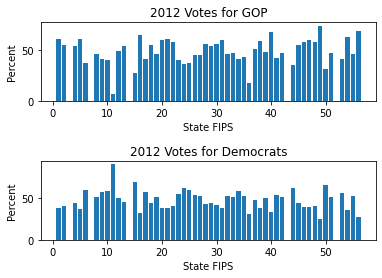

In [22]:
#22
#charts for state voting percentages in 2012
plt.subplot(2,1,1)
plt.bar(df.state_fips, df.gop_2012_prc)
plt.xlabel('State FIPS')
plt.ylabel('Percent')
plt.title('2012 Votes for GOP')

plt.subplot(2,1,2)
plt.bar(df.state_fips, df.dem_2012_prc)
plt.xlabel('State FIPS')
plt.ylabel('Percent')
plt.title('2012 Votes for Democrats')
plt.subplots_adjust(wspace = 0.5, hspace = 0.75)

In [23]:
#23
#sort states by most Democratic to Least Democratic in 2016
df = df.sort_values(by = 'gop_minus_dem_prc_2016')
df

,state,state_po,state_fips,gop_1976_votes,dem_1976_votes,totalvotes_1976,gop_1976_prc,dem_1976_prc,gop_minus_dem_prc_1976,gop_1980_votes,...,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,Dem Change in 2016
8,District of Columbia,DC,11,27873,137818,168830,16.51,81.63,-65.12,23313,...,7.28,90.91,-83.63,12723,282830,312575,4.07,90.48,-86.41,-0.43
11,Hawaii,HI,15,140003,147375,291301,48.06,50.59,-2.53,130112,...,27.68,70.15,-42.47,128847,266891,437664,29.44,60.98,-31.54,-9.17
4,California,CA,6,3882244,3742284,7803770,49.75,47.95,1.80,4522994,...,37.12,60.24,-23.12,4483810,8753788,14181595,31.62,61.73,-30.11,1.49
21,Massachusetts,MA,25,1030276,1429475,2547558,40.44,56.11,-15.67,1057631,...,37.32,60.34,-23.02,1090893,1995196,3378821,32.29,59.05,-26.76,-1.29
45,Vermont,VT,50,100387,77798,183902,54.59,42.30,12.29,94628,...,30.97,66.57,-35.60,95369,178573,320467,29.76,55.72,-25.96,-10.85
13,Illinois,IL,17,2364269,2271295,4721282,50.08,48.11,1.97,2358049,...,40.73,57.60,-16.87,2146015,3090729,5536424,38.76,55.83,-17.07,-1.77
47,Washington,WA,53,777732,717323,1555534,50.00,46.11,3.89,865244,...,41.29,56.16,-14.87,1221747,1742718,3317019,36.83,52.54,-15.71,-3.62
39,Rhode Island,RI,44,181249,227636,410584,44.14,55.44,-11.30,154793,...,35.24,62.70,-27.46,180543,252525,464144,38.90,54.41,-15.51,-8.29
30,New Jersey,NJ,34,1509688,1444653,3014472,50.08,47.92,2.16,1546557,...,40.62,58.34,-17.72,1601933,2148278,3874046,41.35,55.45,-14.10,-2.89
6,Connecticut,CT,9,719261,647895,1386355,51.88,46.73,5.15,677210,...,40.75,58.09,-17.34,673215,897572,1644920,40.93,54.57,-13.64,-3.52


In [24]:
#24
#just take the data from Virginia
df[df.state == 'Virginia']

,state,state_po,state_fips,gop_1976_votes,dem_1976_votes,totalvotes_1976,gop_1976_prc,dem_1976_prc,gop_minus_dem_prc_1976,gop_1980_votes,...,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,Dem Change in 2016
46,Virginia,VA,51,836554,813896,1697094,49.29,47.96,1.33,989609,...,47.28,51.16,-3.88,1769443,1981473,3982752,44.43,49.75,-5.32,-1.41


Text(0, 0.5, '2016 Democratic Vote Percentage')

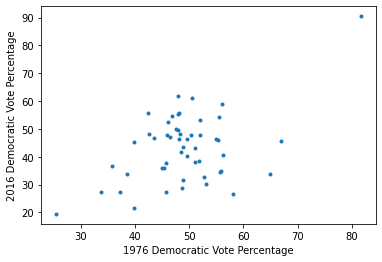

In [25]:
#25
#compare 1976 voting percentages to 2016
#ie are the states that voted democratically in 1976 still doing so in 2016?
_ = plt.plot(df.dem_1976_prc, df.dem_2016_prc, '.')
plt.xlabel('1976 Democratic Vote Percentage')
plt.ylabel('2016 Democratic Vote Percentage')